## Data Exploration and Feature Engineering

### Introduction

The are 81 features describing each sales transaction in Alem, IOW. The first step in the process to analyze the features and get a first glimpse of which feature/data is relevant to the prediction. I decided to follow the 'divide to conquer' category by grouping the features to the following categories that known to be the areas of interest when a customer is shopping for the dream house. I  defined the following main categories:

Kitchen features:
Basement Features: "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF"and  "TotalBsmtSF"

Garage Features: "GarageYrBlt", "GarageFinish", "GarageCars", "GarageArea", "GarageQual", "GarageCond"
Porch Features: "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch"
External Features: Exterior1st, Exterior2nd, RoofMatl, RoofStyle, MasVnrArea, ExterQual, ExterCond, Foundation

Size features:
Quality Features: OverallQual, OverallCond,
House Type Features: "BldgType", "HouseStyle"
House Location Features:

I will then analyze each feature whithin each category and find opportinities:

To delete the feature if doesn't add a significant value in the house price prediction.
Transform numerical features to categorial features when they don't describe a magnitude.
Transform categorial features to ordinal features when they describe a magnitude (ie: Excellent, Very Good, Good...e).
Transform categorial feature to OneHot encoded feature when possible.
Suppress duplicated features or features that are strongly correlated with each other to avoid duplication and redundacy.
supress features that has vey low variance since








## Data Exploration


We have 1460 entries in training data and another 1459 entries in testing data with each entry having 80 features

In [144]:
import numpy as np
import pandas as pd

# read in test and train data
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

print("Rows     : ", train_df.shape[0])
print("Columns  : ", train_df.shape[1])
print("Features : ", train_df.columns.tolist())
print("Missing values : ", train_df.isnull().sum().values.sum())
print("Unique values : ", train_df.nunique())
print("Test Data Shape : ", test_df.shape, "Train Data Shape", train_df.shape)

print("train data shape:", train_df.shape, "test data shape", test_df.shape)

Rows     :  1460
Columns  :  81
Features :  ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3Ss

In [145]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Remove Duplicate entries:

In [146]:
train_df.duplicated(subset=None, keep="first")
print("Test", test_df.shape, "Train", train_df.shape)

Test (1459, 80) Train (1460, 81)


## Basement Features

#### Replace Categorical Features with Numerical Features

In [147]:
basement_features = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF"]

train_df[basement_features]

BsmtExposure = {
    "Gd" : 4, # Good Exposure
    "Av": 3,  # Average Exposure
    "Mn": 2,  # Mimimum Exposure
    "No": 1,  # No Exposure
    "NA": 0   # No Basement
}

BsmtFinType1 = {
    "GLQ" : 6, # GLQ	Good Living Quarters
    "ALQ": 5, # LQ	Average Living Quarters
    "BLQ": 4, # BLQ	Below Average Living Quarters
    "Rec": 3, # Rec	Average Rec Room
    "LwQ": 2, # LwQ	Low Quality
    "Unf": 1, # Unf	Unfinshed
    "NA": 0
}

BsmtFinType2 = {
    "GLQ" : 6, # GLQ	Good Living Quarters
    "ALQ": 5, # LQ	Average Living Quarters
    "BLQ": 4, # BLQ	Below Average Living Quarters
    "Rec": 3, # Rec	Average Rec Room
    "LwQ": 2, # LwQ	Low Quality
    "Unf": 1, # Unf	Unfinshed
    "NA": 0
}

BsmtCond = {
    #Ex	Excellent
    "Gd": 4,	# Good
    "TA": 3,	# Typical - slight dampness allowed
    "Fa": 2,	# Fair - dampness or some cracking or settling
    "Po": 1,    # Po	Poor - Severe cracking, settling, or wetness
    "NA": 0     # No Basement
}

BsmtQual = {
    "Ex":	5, # Excellent (100+ inches)
    "Gd":	4, # Good (90-99 inches)
    "TA":	3, # Typical (80-89 inches)
    "Fa":	2, # Fair (70-79 inches)
    "Po":	1, # Poor (<70 inches
    "NA":	0  # No basement
}

train_df.replace(
    {
        "BsmtQual": BsmtQual,
        "BsmtCond": BsmtCond,
        "BsmtFinType1": BsmtFinType1,
        "BsmtFinType2": BsmtFinType2,
        "BsmtExposure": BsmtExposure
    },
    inplace=True,
)
test_df.replace(
    {
        "BsmtQual": BsmtQual,
        "BsmtCond": BsmtCond,
        "BsmtFinType1": BsmtFinType1,
        "BsmtFinType2": BsmtFinType2,
        "BsmtExposure": BsmtExposure
    },
    inplace=True,
)


#### Finding correlated features

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
0,4.0,3.0,1.0,6.0,706,1.0,0,150,856
1,4.0,3.0,4.0,5.0,978,1.0,0,284,1262
2,4.0,3.0,2.0,6.0,486,1.0,0,434,920
3,3.0,4.0,1.0,5.0,216,1.0,0,540,756
4,4.0,3.0,3.0,6.0,655,1.0,0,490,1145


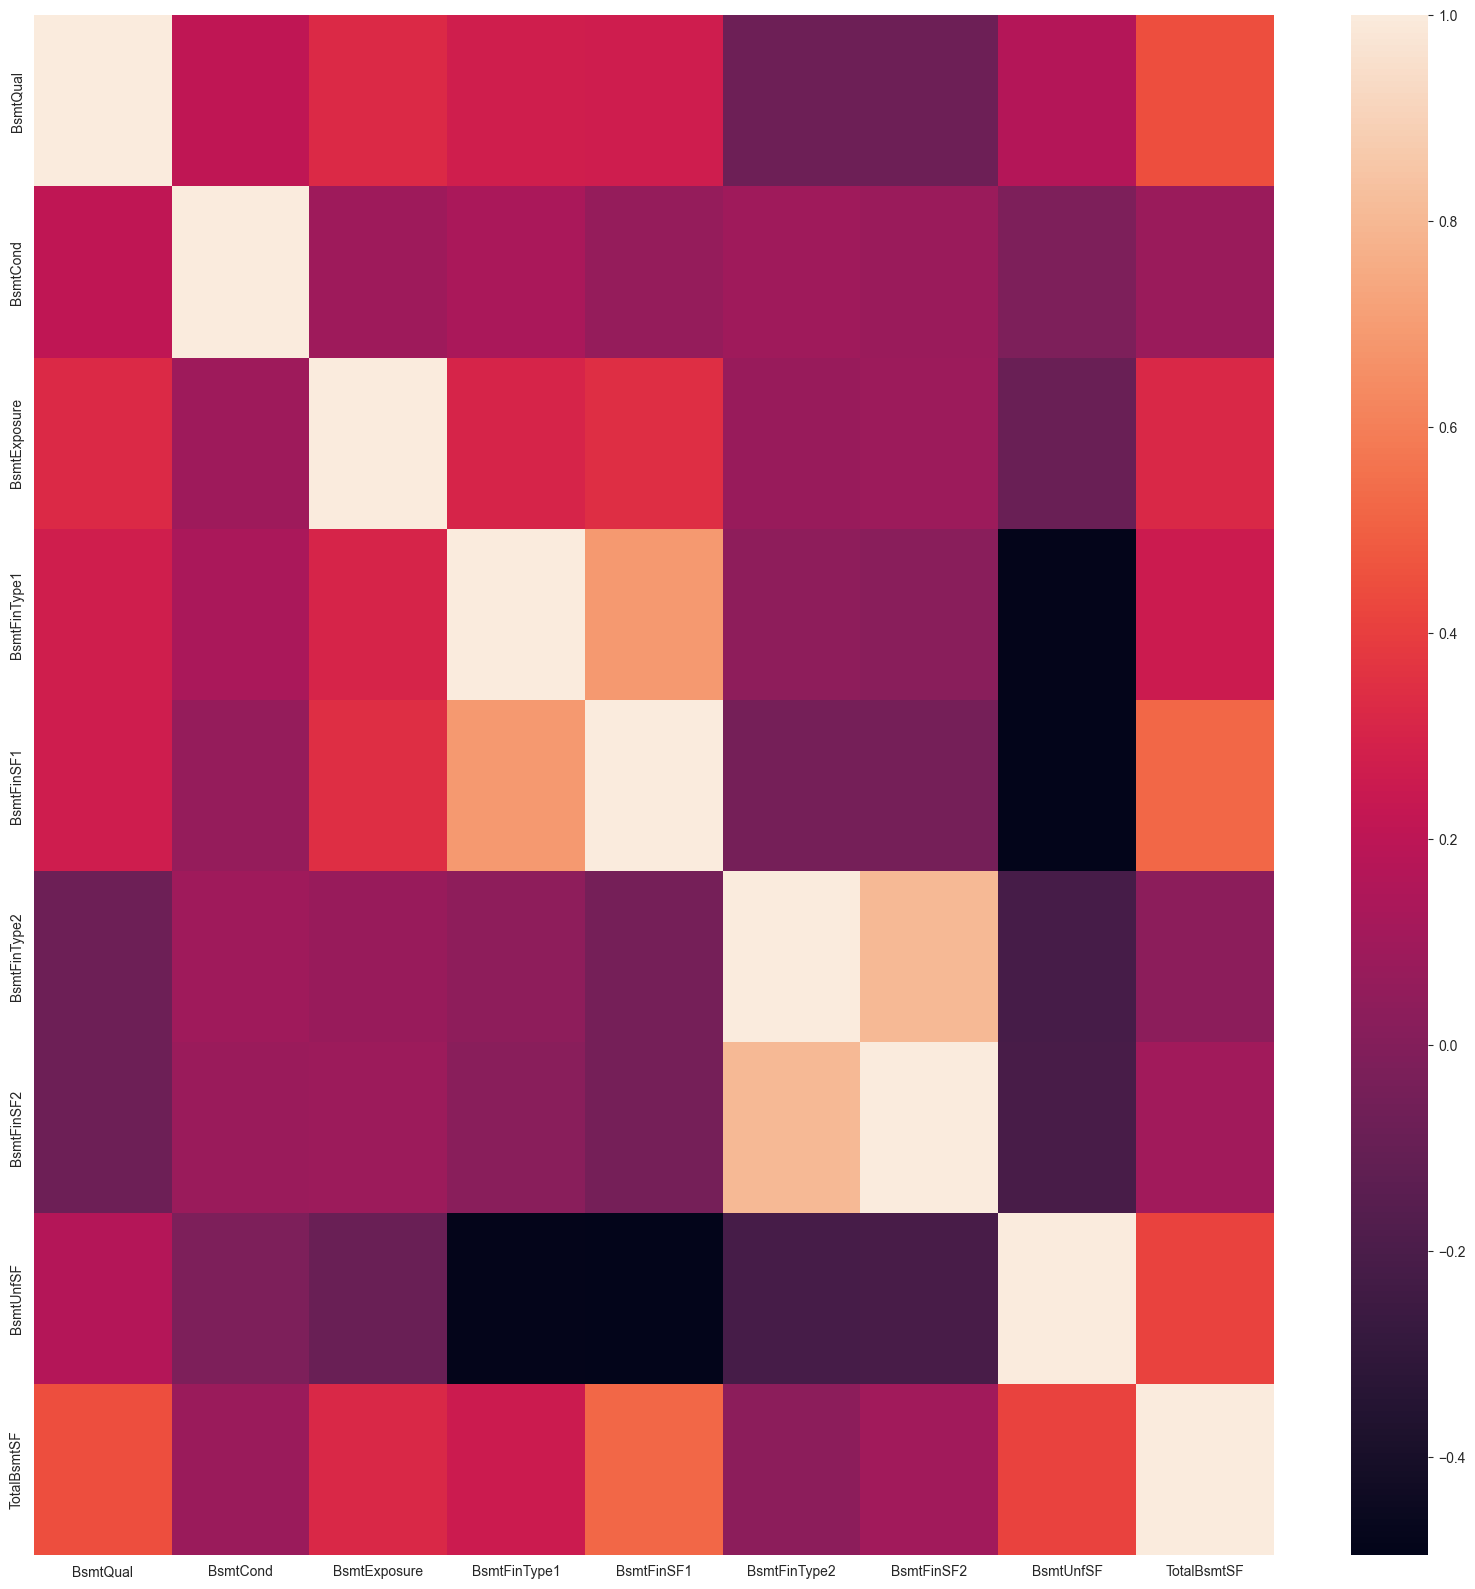

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

basement_features_df = train_df[basement_features]

plt.figure(figsize=(20, 20))
sns.heatmap(basement_features_df.corr())
basement_features_df.head()

From the graph above we notice there is strong correlation between basement size and basement type (BsmtFinSF1 and BsmtFinType1 and also between BsmtFinSF2 and BsmtFinType2).
As result, We can safely discard BsmtFinSF1 and BsmtFinSF2 features.


In [149]:
train_df = train_df.drop("BsmtFinSF1", axis = 1)
train_df = train_df.drop("BsmtFinSF2", axis = 1)
test_df = test_df.drop("BsmtFinSF1", axis = 1)
test_df = test_df.drop("BsmtFinSF2", axis = 1)


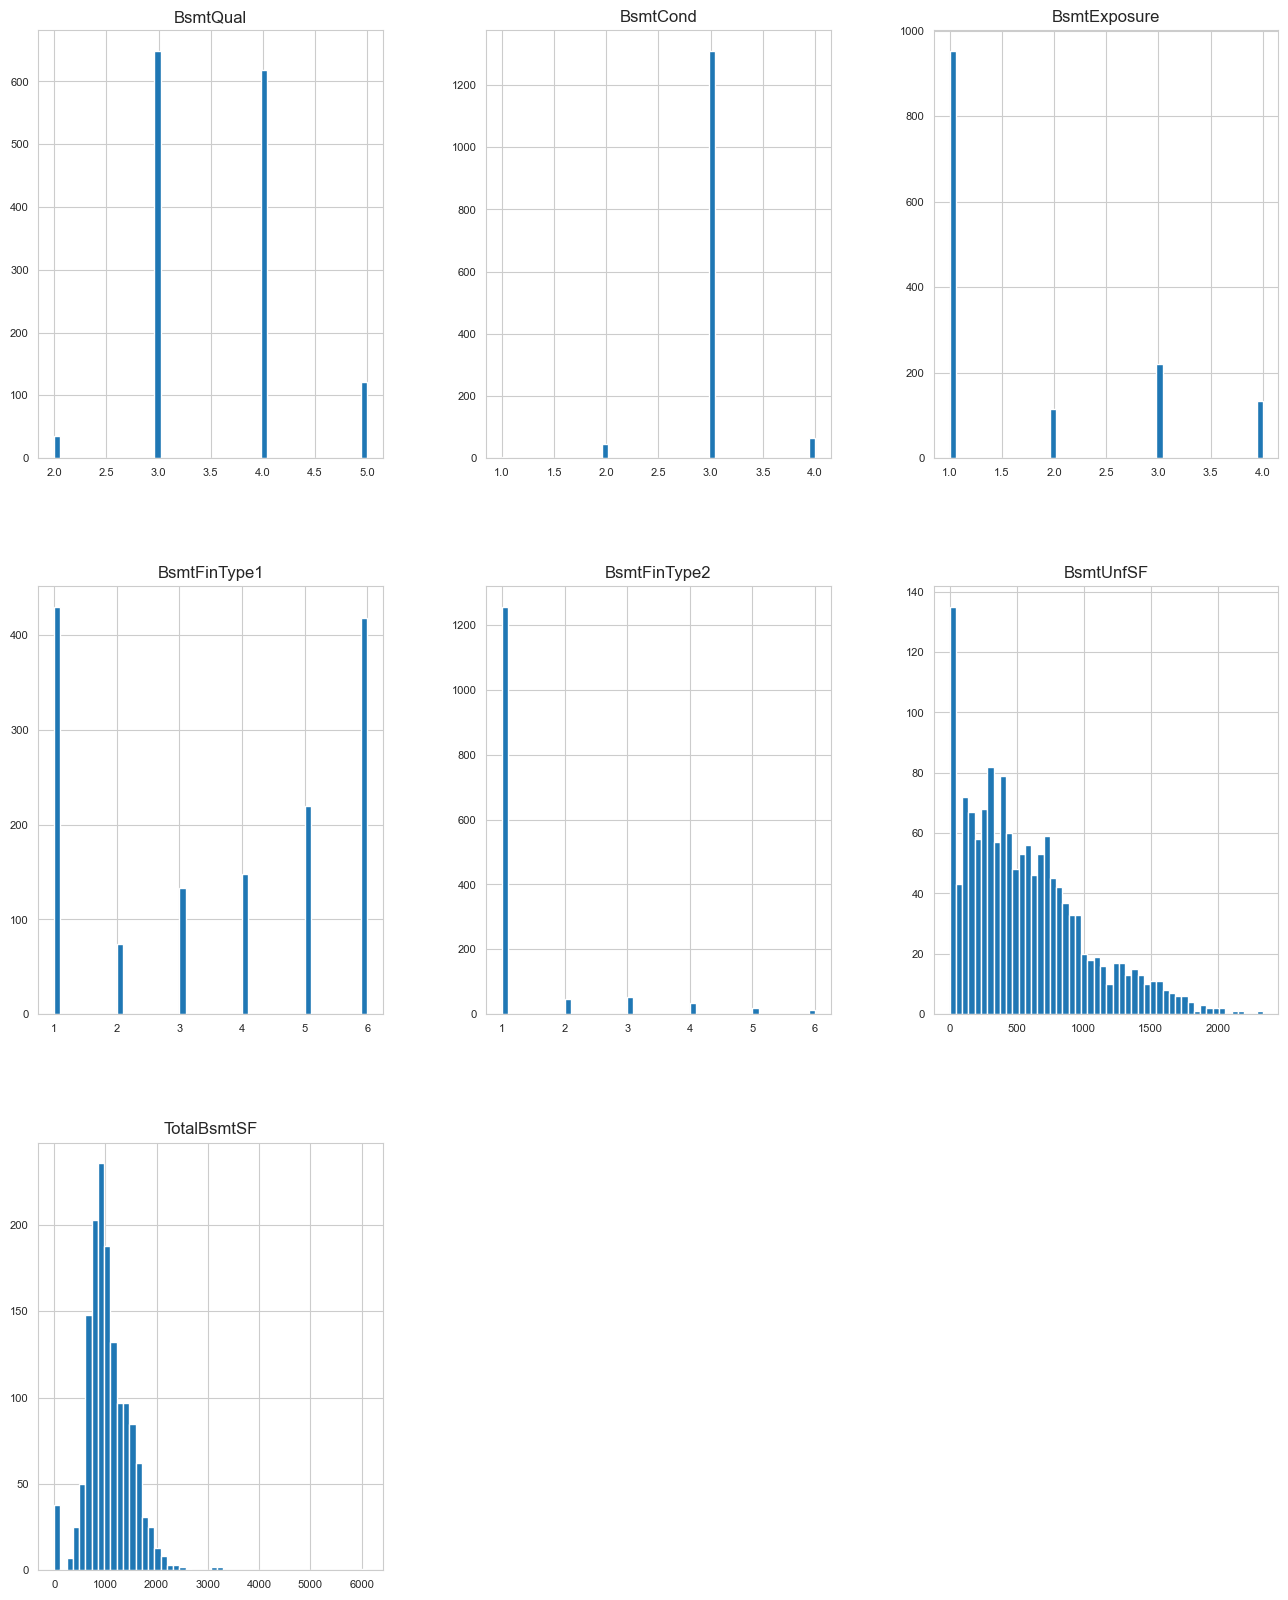

In [150]:
basement_features = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "BsmtUnfSF", "TotalBsmtSF"]
basement_features_df = train_df[basement_features]
basement_features_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);


From the graphs above we notice that both BsmtFinType2 and BsmtCond reflect concentration on 1 value, respectively 3 for BsmCond (most basement have average condition) and 1 for BsmtFinType2 (most basement are Unfinished). Both features will be discarded as they don't add value to the Sales Price prediction.

In [151]:
train_df = train_df.drop("BsmtFinType2", axis = 1)
train_df = train_df.drop("BsmtCond", axis = 1)
test_df = test_df.drop("BsmtFinType2", axis = 1)
test_df = test_df.drop("BsmtCond", axis = 1)

In [152]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Porch Features

,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch
0,61,0,0,0
1,0,0,0,0
2,42,0,0,0
3,35,272,0,0
4,84,0,0,0


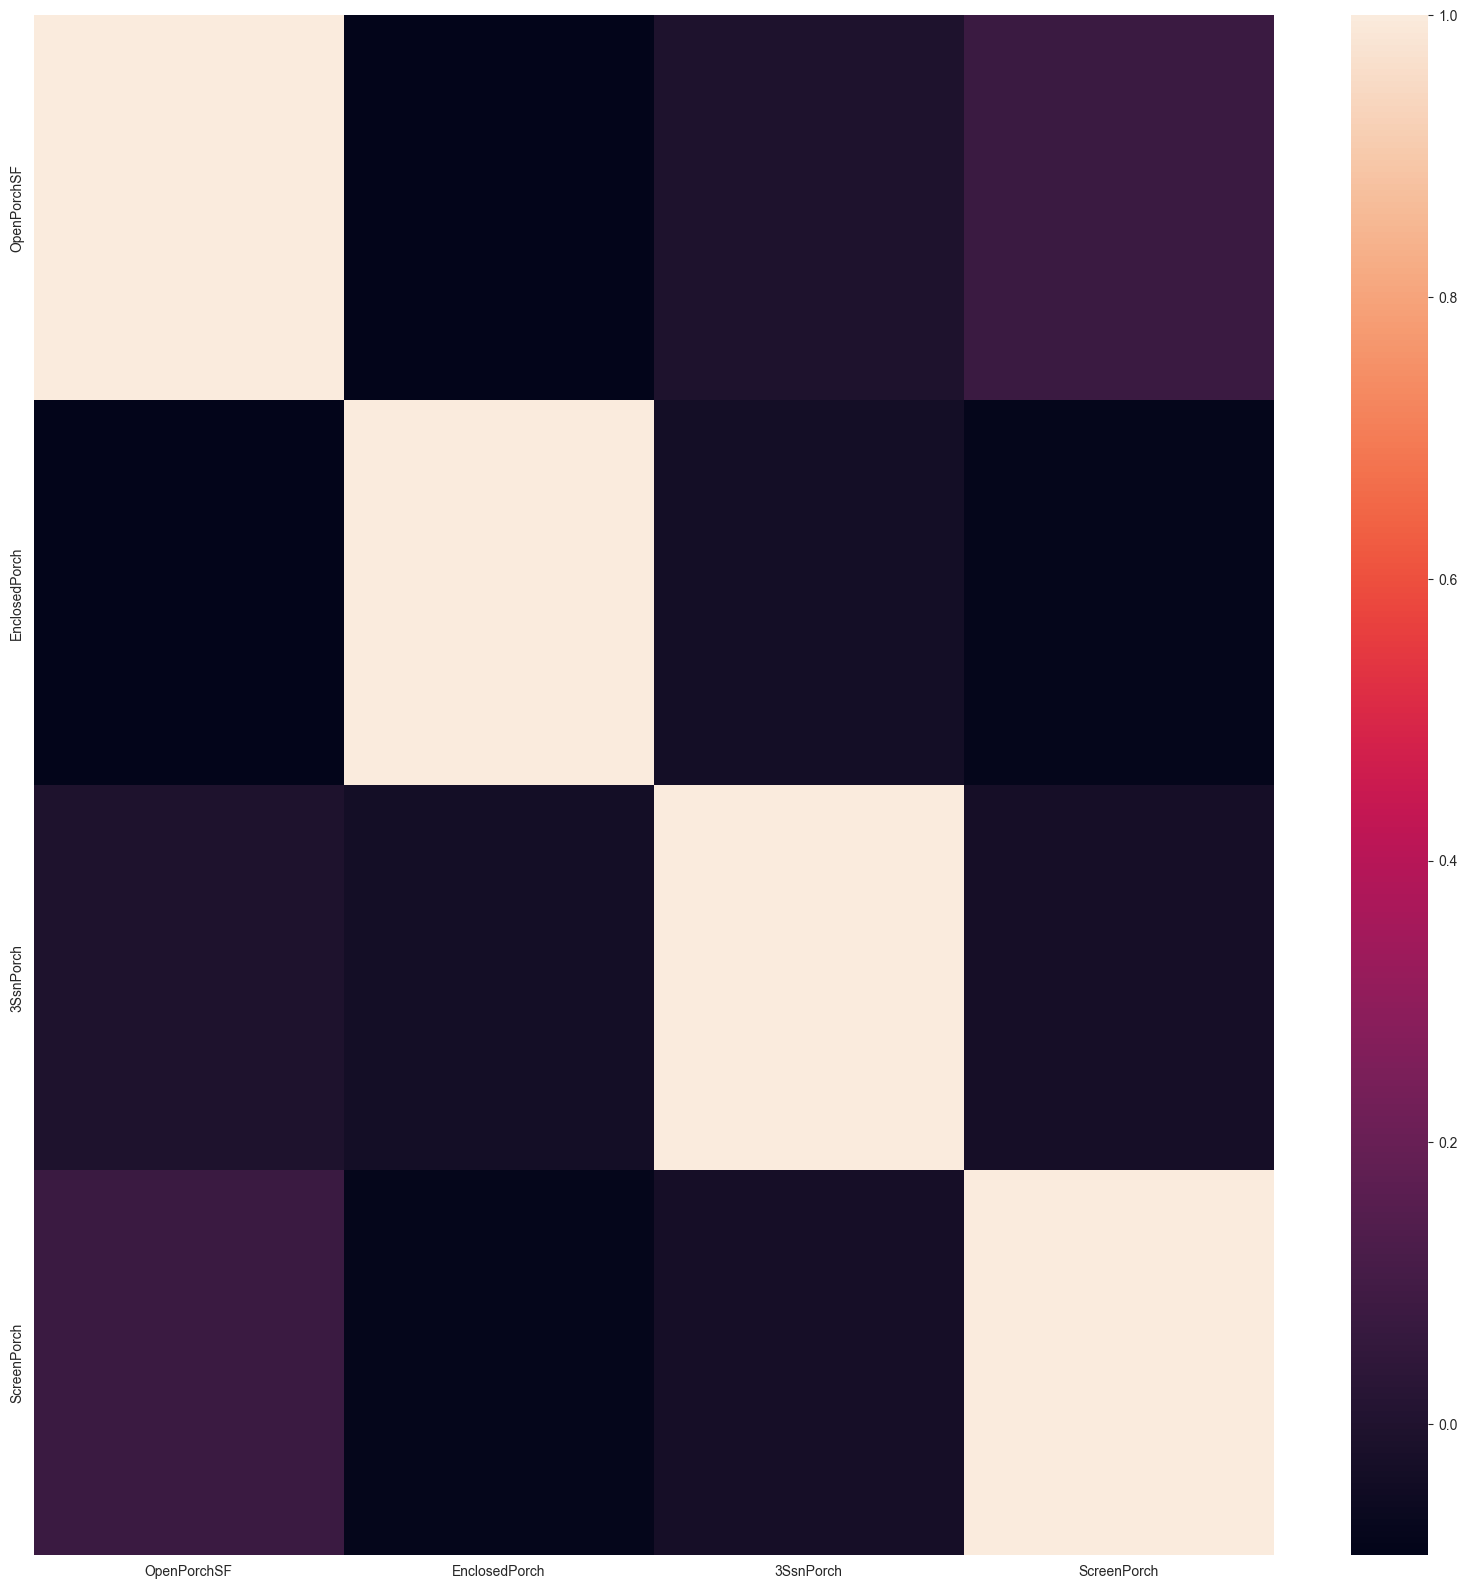

In [153]:
porch_features = ["OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch"]

porch_features_df = train_df[porch_features]

plt.figure(figsize=(20, 20))
sns.heatmap(porch_features_df.corr())
porch_features_df.head()

,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch
0,61,0,0,0
1,0,0,0,0
2,42,0,0,0
3,35,272,0,0
4,84,0,0,0
...,...,...,...,...
1455,40,0,0,0
1456,0,0,0,0
1457,60,0,0,0
1458,0,112,0,0


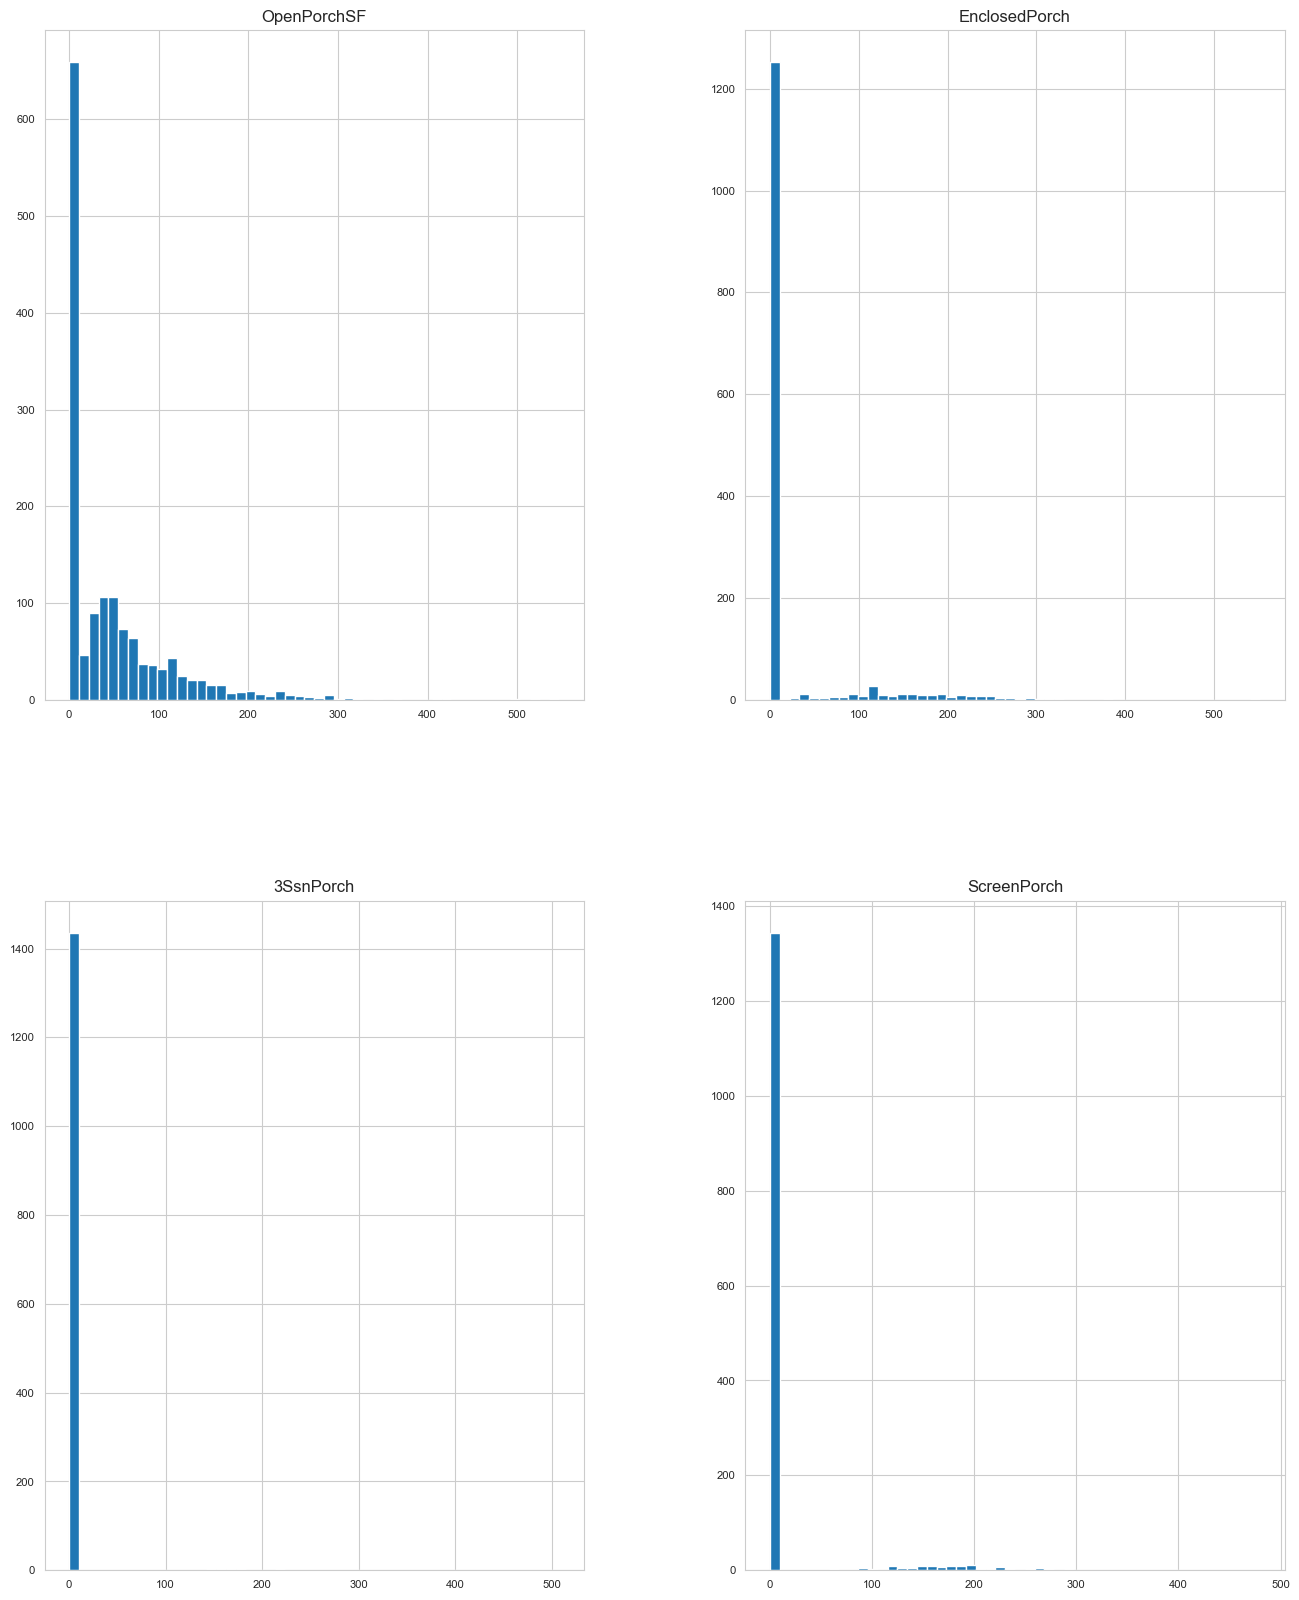

In [154]:
porch_features_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);
porch_features_df

From the graphs below it is abvious that the majority of the sold houses don't have 3 seasons, screen and enclosed orch areas. Teh following features can be discarded : 3SsnPorch, ScreePorch and EnclosedPorch.

In [155]:
train_df = train_df.drop("ScreenPorch", axis = 1)
train_df = train_df.drop("EnclosedPorch", axis = 1)
train_df = train_df.drop("3SsnPorch", axis = 1)
test_df = test_df.drop("ScreenPorch", axis = 1)
test_df = test_df.drop("EnclosedPorch", axis = 1)
test_df = test_df.drop("3SsnPorch", axis = 1)


## External Features

External Quality and External Condition features are converted to numerical values as they reflect a magnitude.
The Graphs below highlight that overall the price increase with better quality and condition so nothing suspicious with the data.

In [156]:
ExterQual = {
    "Ex":	5, # Excellent (100+ inches)
    "Gd":	4, # Good (90-99 inches)
    "TA":	3, # Typical (80-89 inches)
    "Fa":	2, # Fair (70-79 inches)
    "Po":	1, # Poor (<70 inches
    "NA":	0  # No basement
}

ExterCond = {
    "Ex":	5, # Excellent (100+ inches)
    "Gd":	4, # Good (90-99 inches)
    "TA":	3, # Typical (80-89 inches)
    "Fa":	2, # Fair (70-79 inches)
    "Po":	1, # Poor (<70 inches
    "NA":	0  # No basement
}

train_df.replace(
    {
        "ExterCond": ExterCond,
        "ExterQual": ExterQual
    },
    inplace=True,
)
test_df.replace(
    {
        "ExterCond": ExterCond,
        "ExterQual": ExterQual
    },
    inplace=True,
)





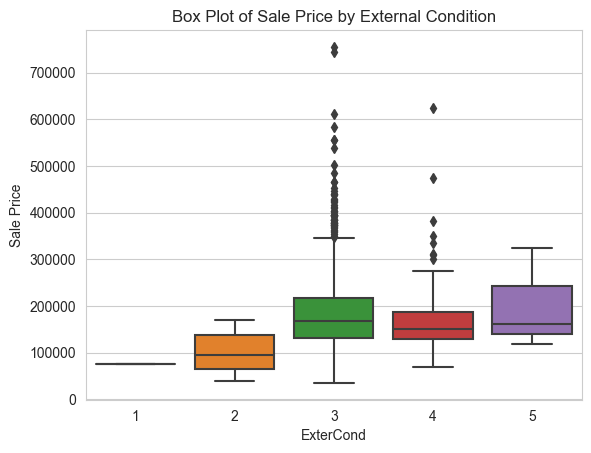

In [157]:
sns.boxplot(x=train_df['ExterCond'], y=train_df['SalePrice'])
plt.xlabel('ExterCond')
plt.ylabel('Sale Price')
plt.title('Box Plot of Sale Price by External Condition')
plt.show()

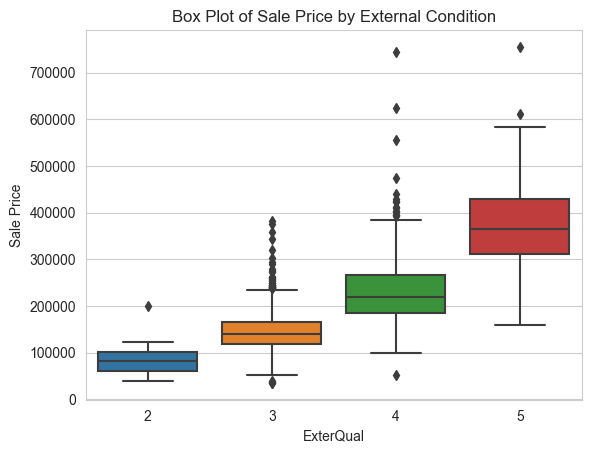

In [158]:
sns.boxplot(x=train_df['ExterQual'], y=train_df['SalePrice'])
plt.xlabel('ExterQual')
plt.ylabel('Sale Price')
plt.title('Box Plot of Sale Price by External Condition')
plt.show()

Most sold houses have Standard (Composite) Shingle roof. We can safely discard the feature: RoofMatl

ClyTile (Clay or Tile)
CompShg (Standard (Composite) Shingle): 1434
Membran	(Membrane) : 1
Metal (Metal) : 1
Roll (Roll) : 1
Tar&Grv	(Gravel & Tar) : 11
WdShake	(Wood Shakes) : 5
WdShngl	(Wood Shingles) : 6


In [159]:
train_df = train_df.drop("RoofMatl", axis = 1)
test_df = test_df.drop("RoofMatl", axis = 1)


We could OneHotCode the emaining exterior categorial features but this will lead to multiplication additional features without the garantee that it add value in the sales prediction algorithm. For now and for seek of simplicity, I decided to only keep the numerical fetaures External Quality and External Condition since based on the graph above the correlate well with the Sales Price.


In [160]:
train_df = train_df.drop("Exterior1st", axis = 1)
test_df = test_df.drop("Exterior1st", axis = 1)
train_df = train_df.drop("Exterior2nd", axis = 1)
test_df = test_df.drop("Exterior2nd", axis = 1)
train_df = train_df.drop("MasVnrArea", axis = 1)
test_df = test_df.drop("MasVnrArea", axis = 1)
train_df = train_df.drop("Foundation", axis = 1)
test_df = test_df.drop("Foundation", axis = 1)



In [161]:

train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Location, Shape and Size Features

In [162]:
location_features = ["MSZoning", "MSSubClass", "LotFrontage", "LotArea", "Alley", "LotShape", "LandContour", "LotConfig", ]

train_df["MSZoning"].value_counts()
train_df["MSSubClass"].value_counts()


MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64

## Feature : Proximity to various conditions

       Artery:	Adjacent to arterial street
       Feedr:	Adjacent to feeder street
       Norm:	Normal
       RRNn: 	Within 200' of North-South Railroad
       RRAn:	Adjacent to North-South Railroad
       PosN:	Near positive off-site feature--park, greenbelt, etc.
       PosA:	Adjacent to postive off-site feature
       RRNe:	Within 200' of East-West Railroad
       RRAe:	Adjacent to East-West Railroad

Most sold houses have normal conditions (more than 84 %).

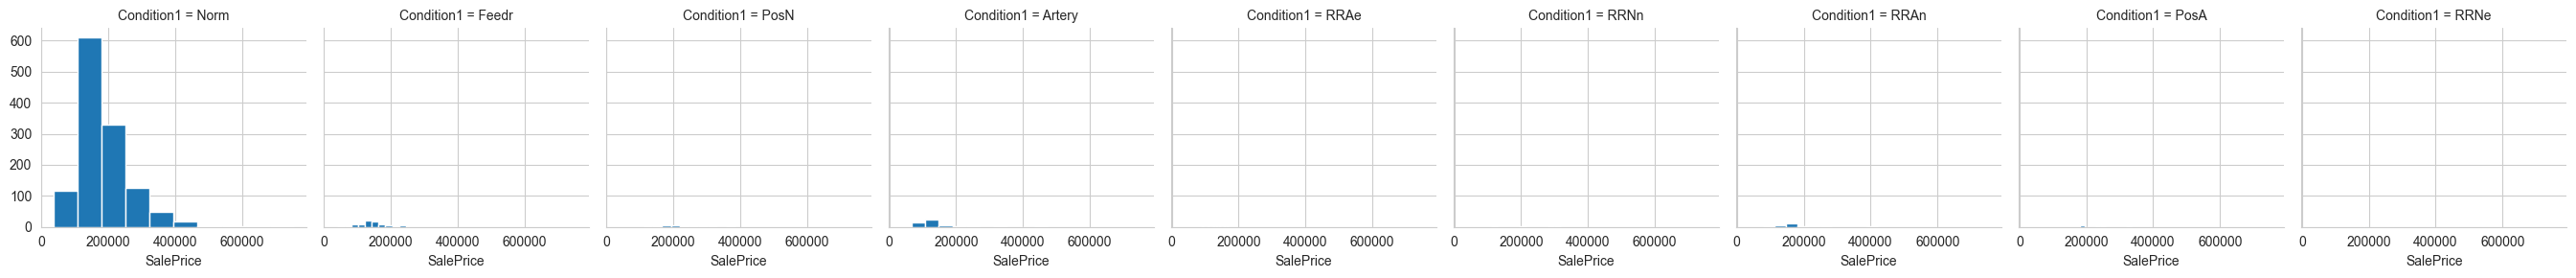

In [163]:
    g = sns.FacetGrid(train_df, col="Condition1")
    g.map(plt.hist, 'SalePrice')

LandSlope, LotSlope and LandContour are categorial fetaures that can be easily replaced with numerical categories as the denote a magnitude

In [209]:
LandSlope = {
    "Gtl" : 1, # Gentle Slope
    "Mod" : 2, # Moderate Moderate
    "Sev" : 3  # Severe Slope
}

LotShape = {
    "Reg" :	1, # Regular Shape
    "IR1" : 2, # Slightly Irregular Shape
    "IR2" : 3, # Moderately Irregular Shape
    "IR3" :	4  # Irregular
}

LandContour = {
    "Lvl" : 1,  # Near Flat/Level
    "Bnk" :	2,  # Banked - Quick and significant rise from street grade to building
    "HLS" : 3,  # Hillside - Significant slope from side to side
    "Low": 4	# Depression
}

LotConfig =  { #Lot configuration
    "Inside"	: 1, # Inside lot
    "Corner"	: 2, # Corner lot
    "CulDSac"	: 3, #Cul-de-sac
    "FR2"	: 4,  #Frontage on 2 sides of property
    "FR3"	: 5,  #Frontage on 3 sides of property
}

train_df.replace(
    {
        "LandSlope": LandSlope,
        "LotShape": LotShape,
        "LandContour": LandContour,
        "LotConfig": LotConfig,
    },
    inplace=True,
)

test_df.replace(
    {
        "LandSlope": LandSlope,
        "LotShape": LotShape,
        "LandContour": LandContour,
        "LotConfig": LotConfig,

    },
    inplace=True,
)


In [210]:
train_df["LotConfig"]

0       1
1       4
2       1
3       2
4       4
       ..
1455    1
1456    1
1457    1
1458    1
1459    1
Name: LotConfig, Length: 1460, dtype: int64

 As shown above more that 84% of the houses sold have a normal condition (1260)
I will discard this feature as it unlikely it will influence the pricing of the house based on the distribution of the data. As result both fetaures "Condition2" and "Condition1" will be discarded.
Also, most house are residential houses. I will for now discard the feature "MSZoning".

In [213]:
train_df = train_df.drop("MSZoning", axis = 1)
test_df = test_df.drop("MSZoning", axis = 1)
train_df = train_df.drop("Condition1", axis = 1)
test_df = test_df.drop("Condition1", axis = 1)
train_df = train_df.drop("Condition2", axis = 1)
test_df = test_df.drop("Condition2", axis = 1)
train_df = train_df.drop("MSZoning", axis = 1)
test_df = test_df.drop("MSZoning", axis = 1)


KeyError: "['Condition1'] not found in axis"

### Feature : TotRmsAbvGrd, Bedroom, GrLivArea, 1stFlrSF, 2ndFlrSF

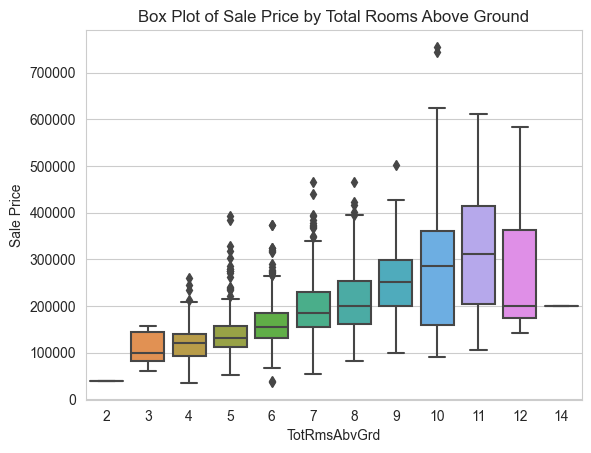

In [166]:
sns.boxplot(x=train_df['TotRmsAbvGrd'], y=train_df['SalePrice'])
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('Sale Price')
plt.title('Box Plot of Sale Price by Total Rooms Above Ground')
plt.show()

In [167]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 67 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   int64  
 8   LandContour    1460 non-null   int64  
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   int64  
 12  Neighborhood   1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

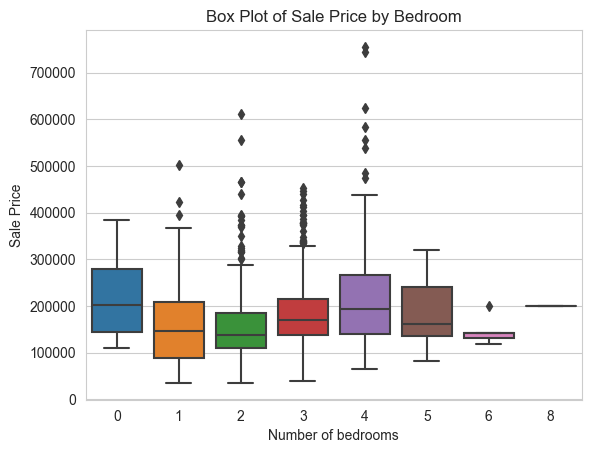

In [168]:
sns.boxplot(x=train_df['BedroomAbvGr'], y=train_df['SalePrice'])
plt.xlabel('Number of bedrooms')
plt.ylabel('Sale Price')
plt.title('Box Plot of Sale Price by Bedroom')
plt.show()

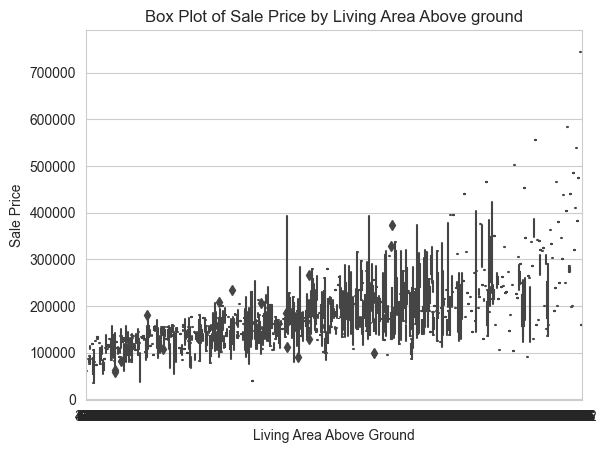

In [169]:
sns.boxplot(x=train_df['GrLivArea'], y=train_df['SalePrice'])
plt.xlabel('Living Area Above Ground')
plt.ylabel('Sale Price')
plt.title('Box Plot of Sale Price by Living Area Above ground')
plt.show()

,TotRmsAbvGrd,BedroomAbvGr,GrLivArea,1stFlrSF,2ndFlrSF
0,8,3,1710,856,854
1,6,3,1262,1262,0
2,6,3,1786,920,866
3,7,3,1717,961,756
4,9,4,2198,1145,1053


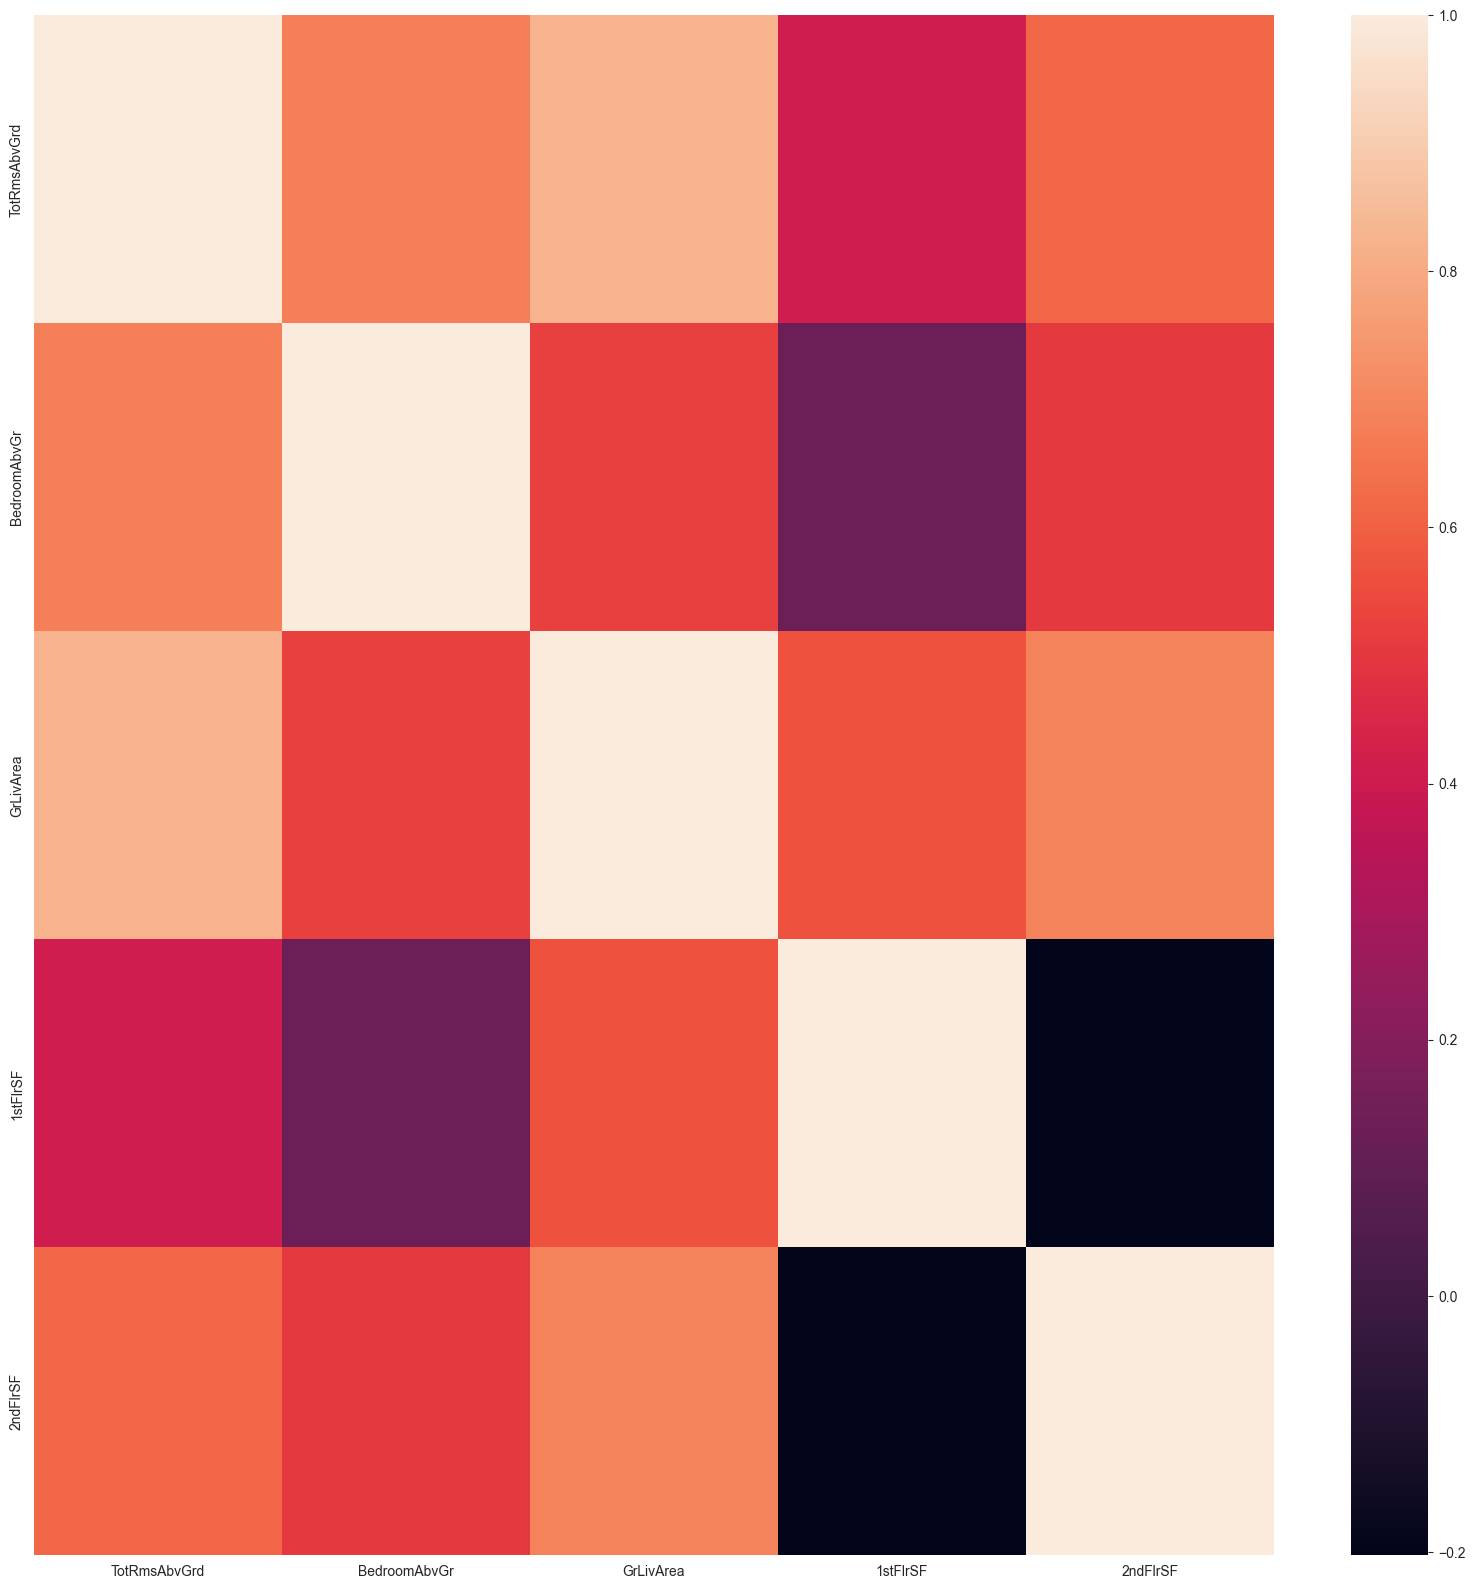

In [170]:
house_size_features = ["TotRmsAbvGrd", "BedroomAbvGr", "GrLivArea", "1stFlrSF", "2ndFlrSF"]

house_size_features_df = train_df[house_size_features]

plt.figure(figsize=(20, 20))
sns.heatmap(house_size_features_df.corr())
house_size_features_df.head()

We notice from the graph a strong corelation between the features : Living Area Above Ground (GrLivArea), Total Rooms Above Ground (BedroomAbvGr) and Total Rooms Above Ground (TotalRmsAbvGrd). Also, I decided to discard the features 1 floor size (1nstFrSF) and 2 floor size (2nstFrSF) for seek of simplicity.

In [171]:

train_df = train_df.drop("1stFlrSF", axis = 1)
test_df = test_df.drop("1stFlrSF", axis = 1)
train_df = train_df.drop("2ndFlrSF", axis = 1)
test_df = test_df.drop("2ndFlrSF", axis = 1)
train_df = train_df.drop("BedroomAbvGr", axis = 1)
test_df = test_df.drop("BedroomAbvGr", axis = 1)

## Garage Features

Since quality is a feature that can be measured and has magnitude GarageQual and GarageCond will be converted to numerical categories. Same apply to GarageFinish feature since it reflect a magnitute (how much of basesment is finished)

In [172]:
#GarageType: Garage location

# 2Types	More than one type of garage
# Attchd	Attached to home
# Basment	Basement Garage
# BuiltIn	Built-In (Garage part of house - typically has room above garage)
# CarPort	Car Port
# Detchd	Detached from home
# NA	No Garage

# GarageYrBlt: Year garage was built
# GarageCars: Size of garage in car capacity
# GarageArea: Size of garage in square feet

GarageQual = {
    "Ex": 5, # Excellent
    "Gd": 4, # Good
    "TA": 3, # Typical/Average
    "Fa": 2, # Fair
    "Po": 1, # Poor
    "NA": 0  # No Garage
}
GarageCond = {
    "Ex": 5, #	Excellent,
    "Gd": 4, #	Good,
    "TA": 3, #	Typical/Average
    "Fa": 2, #  Fair
    "Po": 1, #  Poor
    "NA": 0  # No Garage
}

GarageFinish = {
    # Interior finish of the garage
    "Fin":	3, # Finished
    "RFn":	2, # Rough Finished
    "Unf":	1, # Unfinished
    "NA": 0,   # No Garage
}

garage_features = ["GarageYrBlt", "GarageFinish", "GarageCars", "GarageArea", "GarageQual", "GarageCond"]

train_df[garage_features]

train_df.replace(
    {
        "GarageFinish": GarageFinish,
        "GarageCond": GarageCond,
        "GarageQual": GarageQual
    },
    inplace=True,
)
test_df.replace(
    {
        "GarageFinish": GarageFinish,
        "GarageCond": GarageCond,
        "GarageQual": GarageQual
    },
    inplace=True,
)



The heatmap above highlight that fact that GarageArea (Garage size in square footage) and GarageCars (number of cars that can fit in the garage) are strongly correlated. As result of that, I will discard GarageArea.

In [173]:
train_df = train_df.drop("GarageArea", axis = 1)
test_df = test_df.drop("GarageArea", axis = 1)

In [174]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   int64  
 8   LandContour    1460 non-null   int64  
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   int64  
 12  Neighborhood   1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

## Utilities Featutes

In [175]:
utilitites_features = ["Electrical", "Utilities", "Fireplaces", "FireplaceQu", "Heating", "HeatingQC", "CentralAir"]

fireplace_quality = {
    "Ex": 5, # Excellent - Exceptional Masonry Fireplace
    "Gd": 4, # Good - Masonry Fireplace in main level
    "TA": 3, # Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
    "Fa": 2, # Fair - Prefabricated Fireplace in basement
    "Po": 1, # Poor - Ben Franklin Stove
    "NA": 0  # No Fireplace
}
train_df.replace(
    {
        "FireplaceQu": fireplace_quality,
    },
    inplace=True,
)

test_df.replace(
    {
        "FireplaceQu": fireplace_quality,
    },
    inplace=True,
)

train_df["CentralAir"].value_counts()

CentralAir
Y    1365
N      95
Name: count, dtype: int64

The features "Electrical", "Utilities", "Heating", "HeatingQC" and "CentralAir" will be discarded as they don't manifest a normal distribution. For example all entries have Utilities except 1 as "AllPubl" (All public Utilities)

In [176]:
train_df = train_df.drop("Electrical", axis = 1)
test_df = test_df.drop("Electrical", axis = 1)

In [177]:
train_df = train_df.drop("Utilities", axis = 1)
test_df = test_df.drop("Utilities", axis = 1)

In [178]:
train_df = train_df.drop("Heating", axis = 1)
test_df = test_df.drop("Heating", axis = 1)

In [179]:
train_df = train_df.drop("HeatingQC", axis = 1)
test_df = test_df.drop("HeatingQC", axis = 1)

In [180]:
train_df = train_df.drop("CentralAir", axis = 1)
test_df = test_df.drop("CentralAir", axis = 1)

In [181]:
train_df["Neighborhood"].value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

In [182]:
train_df["MSZoning"].value_counts()


MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [183]:
train_df["BldgType"].value_counts()


BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64

In [184]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   int64  
 8   LandContour    1460 non-null   int64  
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

## Kitchen Features

In [185]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   int64  
 8   LandContour    1460 non-null   int64  
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [186]:
kitchen_features = ["KitchenAbvGr", "KitchenQual"]

My feeling is that the kitchen quality matters more in influencing the sales price of teh house. Most houses will have 1 kitchen. Indeed from the collected data only 4% of the houses have 2 kitchens, 1 house has no kitchen and 2 houses have 3 kitchens. It is safe to discard this feature as it doesn't add value to the sales prediction.

In [187]:
train_df["KitchenAbvGr"].value_counts()

KitchenAbvGr
1    1392
2      65
3       2
0       1
Name: count, dtype: int64

In [188]:
train_df = train_df.drop("KitchenAbvGr", axis = 1)
test_df = test_df.drop("KitchenAbvGr", axis = 1)

The feature "KitchenQual" can be transformed to a numerical value as it reflect a magnitude

In [189]:
kitchen_quality = {
    "Ex": 5, # Excellent - Exceptional Masonry Fireplace
    "Gd": 4, # Good - Masonry Fireplace in main level
    "TA": 3, # Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
    "Fa": 2, # Fair - Prefabricated Fireplace in basement
    "Po": 1, # Poor - Ben Franklin Stove
}

train_df.replace(
    {
        "KitchenQual": kitchen_quality,
    },
    inplace=True,
)


## Pool Features

From the home sales data only 7 houses out of 1460 have a swimming pool. We can safely discard pool featured as it doesn't add value to the sales price prediction.

In [190]:
pool_features = ["PoolArea", "PoolQC"]
train_df["LotConfig"].value_counts()


LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

In [191]:
train_df = train_df.drop("PoolArea", axis = 1)
test_df = test_df.drop("PoolArea", axis = 1)

In [192]:
train_df = train_df.drop("PoolQC", axis = 1)
test_df = test_df.drop("PoolQC", axis = 1)

In [193]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   int64  
 8   LandContour    1460 non-null   int64  
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

## Bathrooms Features

I sum the full baths and half baths in the house and also the full baths and half baths in the basement and create new features:
"total_bathroom" and "total_basement_bathroom". From the correlation graph below we can see that the features total_bathroom correlates well with "BsmtFullBath" and the new feature "total_basement_bathroom" correlated well with "BsmtHalfBath". As a result we can safely discard the features: "FullBath", "HalfBath", "BsmtHalfBath" and "BsmtFullBath" and replace it with: "total_bathroom" and total_basement_bathroom".

,TotRmsAbvGrd,BedroomAbvGr,GrLivArea,1stFlrSF,2ndFlrSF
0,8,3,1710,856,854
1,6,3,1262,1262,0
2,6,3,1786,920,866
3,7,3,1717,961,756
4,9,4,2198,1145,1053


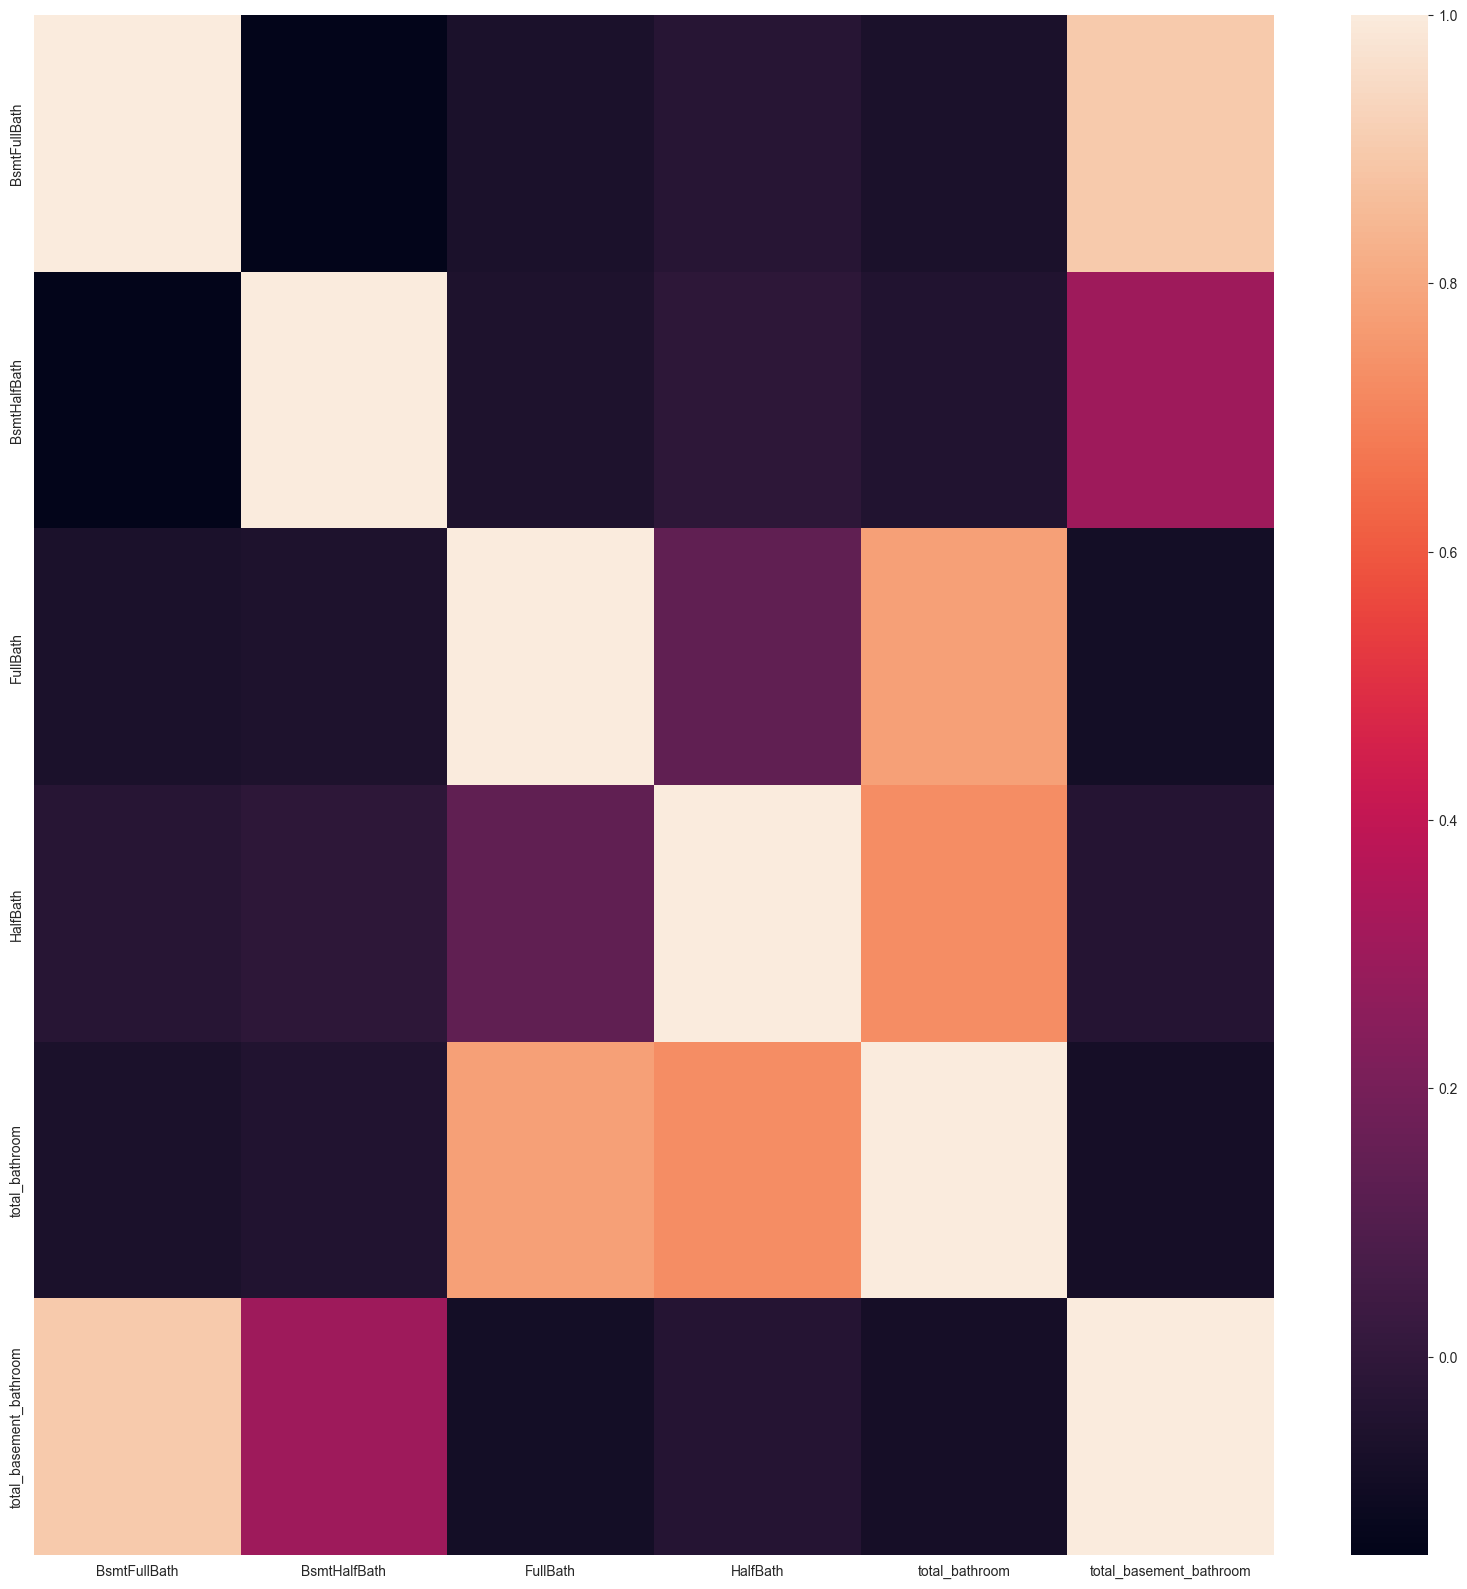

In [194]:

train_df["total_bathroom"] =  train_df["FullBath"] + train_df["HalfBath"]
train_df["total_basement_bathroom"] =  train_df["BsmtHalfBath"] + train_df["BsmtFullBath"]

test_df["total_bathroom"] =  test_df["FullBath"] + test_df["HalfBath"]
test_df["total_basement_bathroom"] =  test_df["BsmtHalfBath"] + test_df["BsmtFullBath"]

bathroom_features = ["BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "total_bathroom", "total_basement_bathroom"]

plt.figure(figsize=(20, 20))
sns.heatmap(train_df[bathroom_features].corr())
house_size_features_df.head()

In [195]:
train_df = train_df.drop("BsmtFullBath", axis = 1)
test_df = test_df.drop("BsmtFullBath", axis = 1)
train_df = train_df.drop("BsmtHalfBath", axis = 1)
test_df = test_df.drop("BsmtHalfBath", axis = 1)
train_df = train_df.drop("FullBath", axis = 1)
test_df = test_df.drop("FullBath", axis = 1)
train_df = train_df.drop("HalfBath", axis = 1)
test_df = test_df.drop("HalfBath", axis = 1)

In [196]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       1460 non-null   int64  
 1   MSSubClass               1460 non-null   int64  
 2   MSZoning                 1460 non-null   object 
 3   LotFrontage              1201 non-null   float64
 4   LotArea                  1460 non-null   int64  
 5   Street                   1460 non-null   object 
 6   Alley                    91 non-null     object 
 7   LotShape                 1460 non-null   int64  
 8   LandContour              1460 non-null   int64  
 9   LotConfig                1460 non-null   object 
 10  LandSlope                1460 non-null   int64  
 11  Neighborhood             1460 non-null   object 
 12  BldgType                 1460 non-null   object 
 13  HouseStyle               1460 non-null   object 
 14  OverallQual             

## Home Type features

The building type fearture ("BldgType") and House Style feature ("HouseStyle") can be converted to numerical category as it reflect a magnitude.

In [205]:

BldgType = {
    "1Fam" : 1, #	Single-family Detached
    "2FmCon" : 2,	# Two-family Conversion; originally built as one-family dwelling
    "2fmCon" : 2,	# Two-family Conversion; originally built as one-family dwelling
    "Duplx" : 3, 	# Duplex
    "Duplex" : 3, 	# Duplex
    "TwnhsE" : 4,	# Townhouse End Unit
    "Twnhs" : 4,	# Townhouse End Unit
    "TwnhsI" : 5	# Townhouse Inside Unit
}

HouseStyle = {
    "1Story" : 1,  #	One story
    "1.5Unf" :	2, #, # One and one-half story: 2nd level unfinished
    "1.5Fin" :	3, # One and one-half story: 2nd level finished
    "2Story" : 4, #	Two story
    "2.5Unf" :	5, # Two and one-half story: 2nd level unfinished
    "2.5Fin" : 6, #	Two and one-half story: 2nd level finished
    "SFoyer" : 7, #	Split Foyer
    "SLvl"	: 8  # Split Level
}

train_df.replace(
    {
        "BldgType": BldgType,
    },
    inplace=True,
)

test_df.replace(
    {
        "BldgType": BldgType,
    },
    inplace=True,
)

train_df.replace(
    {
        "HouseStyle": HouseStyle,
    },
    inplace=True,
)

test_df.replace(
    {
        "HouseStyle": HouseStyle,
    },
    inplace=True,
)
home_type_features = ["BldgType", "HouseStyle", "MSSubClass"]
train_df[home_type_features]

,BldgType,HouseStyle,MSSubClass
0,1,4,60
1,1,1,20
2,1,4,60
3,1,4,70
4,1,4,60
...,...,...,...
1455,1,4,60
1456,1,1,20
1457,1,4,70
1458,1,1,20


AttributeError: 'list' object has no attribute 'head'

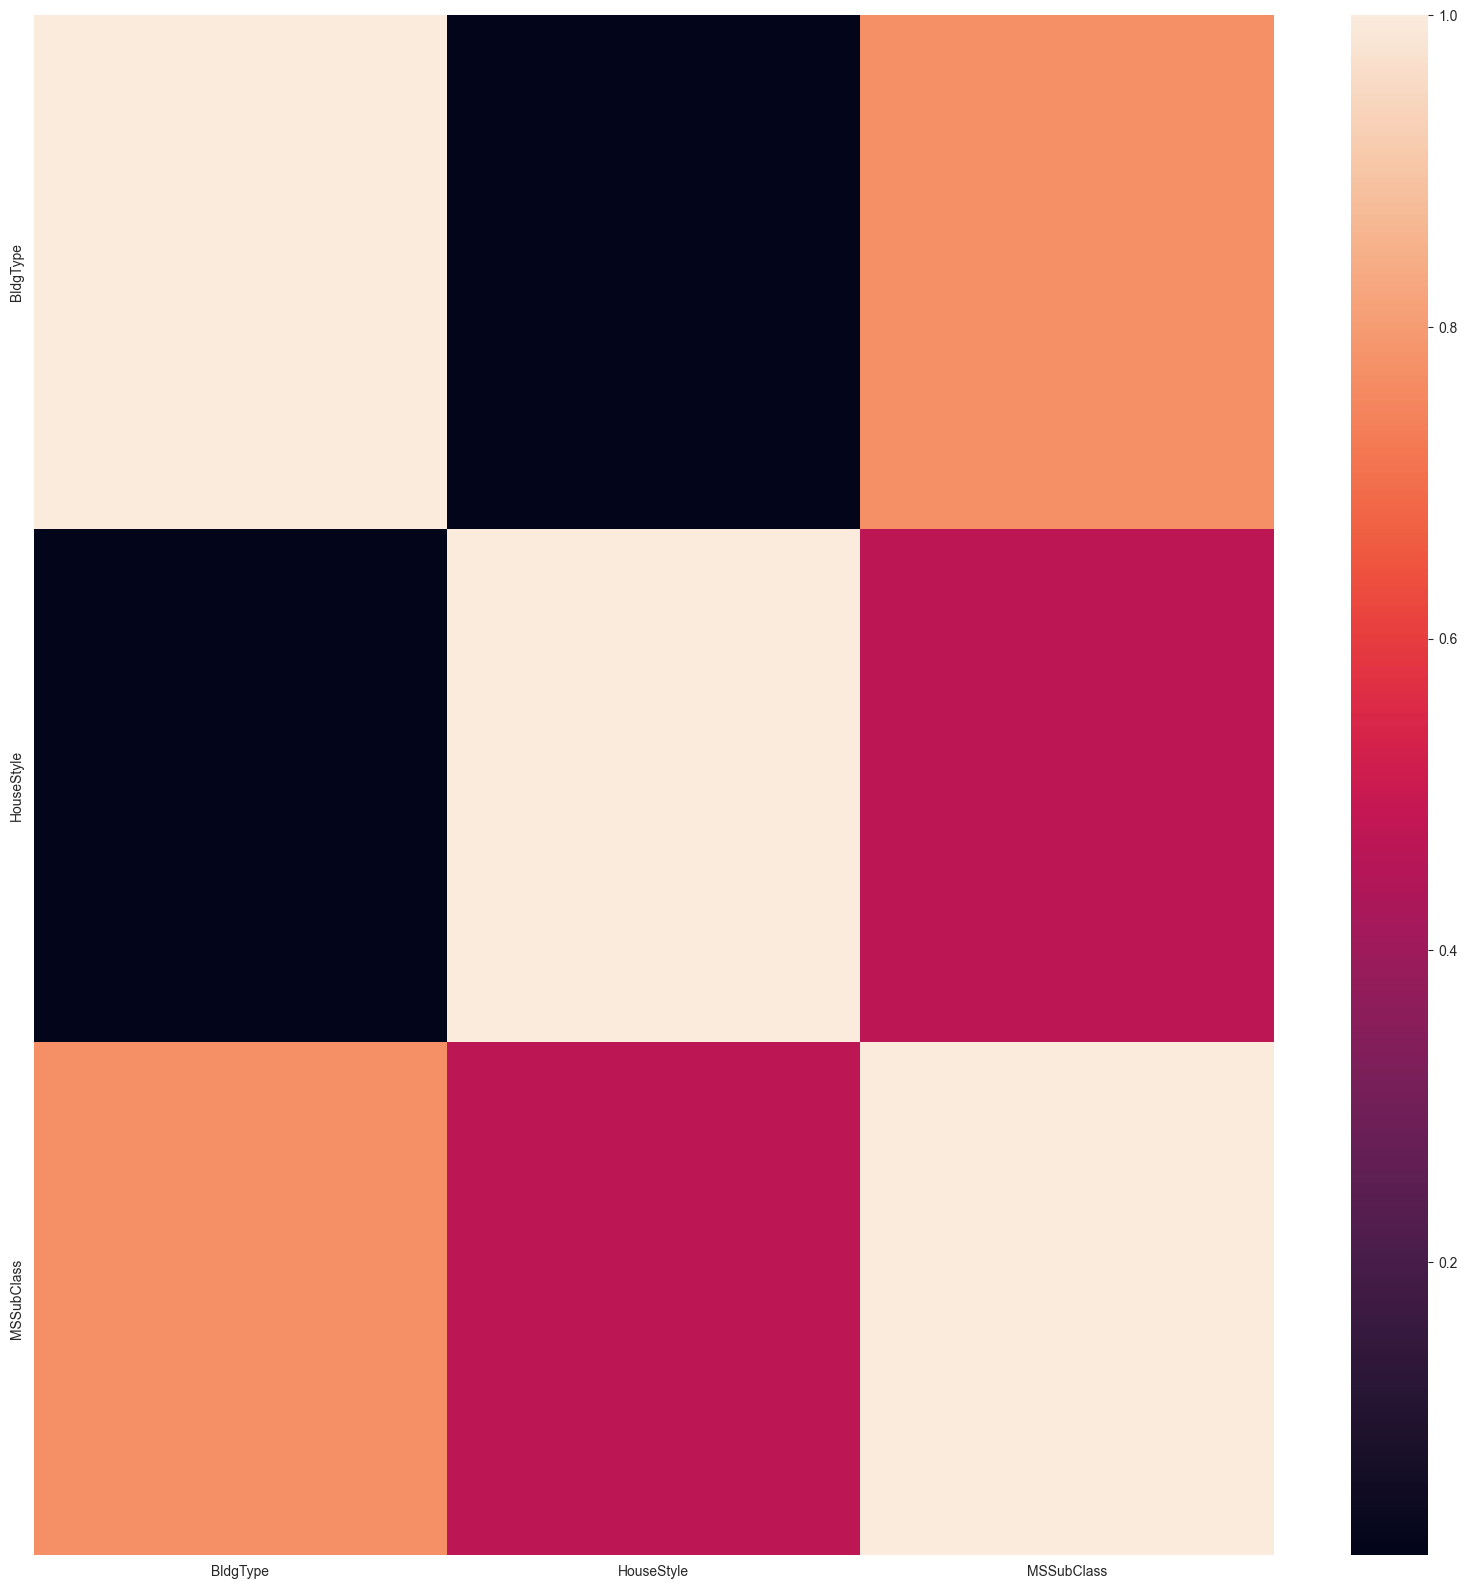

In [206]:
home_type_features = ["BldgType", "HouseStyle", "MSSubClass"]

plt.figure(figsize=(20, 20))
sns.heatmap(train_df[home_type_features].corr())
home_type_features.head()

I will discard MSSubClass as it correlated well with BldgType


In [207]:
train_df = train_df.drop("MSSubClass", axis = 1)
test_df = test_df.drop("MSSubClass", axis = 1)

In [214]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       1460 non-null   int64  
 1   LotFrontage              1201 non-null   float64
 2   LotArea                  1460 non-null   int64  
 3   Street                   1460 non-null   object 
 4   Alley                    91 non-null     object 
 5   LotShape                 1460 non-null   int64  
 6   LandContour              1460 non-null   int64  
 7   LotConfig                1460 non-null   int64  
 8   LandSlope                1460 non-null   int64  
 9   Neighborhood             1460 non-null   object 
 10  BldgType                 1460 non-null   int64  
 11  HouseStyle               1460 non-null   int64  
 12  OverallQual              1460 non-null   int64  
 13  OverallCond              1460 non-null   int64  
 14  YearBuilt               

In [211]:
train_df["MSZoning"].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

## Other Features ..

I decided to discard the following features:
Street
Alley
YearBuilt
YearRemodAdd
RoofStyle
MasVnrType
Functional
GarageType
GarageYrBlt
GarageFinish
PavedDrive
WoodDeckSF
OpenPorchSF
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice

In [224]:
to_be_dropped_features = ["Street", "SaleCondition", "Alley","YearBuilt","YearRemodAdd","RoofStyle", "MasVnrType","Functional","GarageType","GarageYrBlt","GarageFinish","PavedDrive","WoodDeckSF","OpenPorchSF","Fence","MiscFeature","MiscVal","MoSold","YrSold","SaleType"]

test_df = test_df.drop(to_be_dropped_features,  axis = 1)
train_df = train_df.drop(to_be_dropped_features,  axis = 1)



KeyError: "['Street', 'Alley', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'MasVnrType', 'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType'] not found in axis"

In [225]:

test_df = test_df.drop("SaleCondition",  axis = 1)
train_df = train_df.drop("SaleCondition",  axis = 1)

In [226]:

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       1460 non-null   int64  
 1   LotFrontage              1201 non-null   float64
 2   LotArea                  1460 non-null   int64  
 3   LotShape                 1460 non-null   int64  
 4   LandContour              1460 non-null   int64  
 5   LotConfig                1460 non-null   int64  
 6   LandSlope                1460 non-null   int64  
 7   Neighborhood             1460 non-null   object 
 8   BldgType                 1460 non-null   int64  
 9   HouseStyle               1460 non-null   int64  
 10  OverallQual              1460 non-null   int64  
 11  OverallCond              1460 non-null   int64  
 12  ExterQual                1460 non-null   int64  
 13  ExterCond                1460 non-null   int64  
 14  BsmtQual                

In [227]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       1459 non-null   int64  
 1   LotFrontage              1232 non-null   float64
 2   LotArea                  1459 non-null   int64  
 3   LotShape                 1459 non-null   int64  
 4   LandContour              1459 non-null   int64  
 5   LotConfig                1459 non-null   int64  
 6   LandSlope                1459 non-null   int64  
 7   Neighborhood             1459 non-null   object 
 8   BldgType                 1459 non-null   int64  
 9   HouseStyle               1459 non-null   int64  
 10  OverallQual              1459 non-null   int64  
 11  OverallCond              1459 non-null   int64  
 12  ExterQual                1459 non-null   int64  
 13  ExterCond                1459 non-null   int64  
 14  BsmtQual                

In [228]:
plt.figure(figsize=(20, 20))
sns.heatmap(train_df.corr())
train_df.head()

ValueError: could not convert string to float: 'CollgCr'

<Figure size 2000x2000 with 0 Axes>

In [230]:
train_df["Neighborhood"]

0       CollgCr
1       Veenker
2       CollgCr
3       Crawfor
4       NoRidge
         ...   
1455    Gilbert
1456     NWAmes
1457    Crawfor
1458      NAmes
1459    Edwards
Name: Neighborhood, Length: 1460, dtype: object

In [231]:
train_df = pd.get_dummies(train_df, columns=["Neighborhood"], prefix="Neighborhood")


In [233]:
test_df = pd.get_dummies(test_df, columns=["Neighborhood"], prefix="Neighborhood")


In [232]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       1460 non-null   int64  
 1   LotFrontage              1201 non-null   float64
 2   LotArea                  1460 non-null   int64  
 3   LotShape                 1460 non-null   int64  
 4   LandContour              1460 non-null   int64  
 5   LotConfig                1460 non-null   int64  
 6   LandSlope                1460 non-null   int64  
 7   BldgType                 1460 non-null   int64  
 8   HouseStyle               1460 non-null   int64  
 9   OverallQual              1460 non-null   int64  
 10  OverallCond              1460 non-null   int64  
 11  ExterQual                1460 non-null   int64  
 12  ExterCond                1460 non-null   int64  
 13  BsmtQual                 1423 non-null   float64
 14  BsmtExposure            

In [234]:
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       1459 non-null   int64  
 1   LotFrontage              1232 non-null   float64
 2   LotArea                  1459 non-null   int64  
 3   LotShape                 1459 non-null   int64  
 4   LandContour              1459 non-null   int64  
 5   LotConfig                1459 non-null   int64  
 6   LandSlope                1459 non-null   int64  
 7   BldgType                 1459 non-null   int64  
 8   HouseStyle               1459 non-null   int64  
 9   OverallQual              1459 non-null   int64  
 10  OverallCond              1459 non-null   int64  
 11  ExterQual                1459 non-null   int64  
 12  ExterCond                1459 non-null   int64  
 13  BsmtQual                 1415 non-null   float64
 14  BsmtExposure            

,Id,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,BldgType,HouseStyle,OverallQual,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,1,65.0,8450,1,1,1,1,1,4,7,...,False,False,False,False,False,False,False,False,False,False
1,2,80.0,9600,1,1,4,1,1,1,6,...,False,False,False,False,False,False,False,False,False,True
2,3,68.0,11250,2,1,1,1,1,4,7,...,False,False,False,False,False,False,False,False,False,False
3,4,60.0,9550,2,1,2,1,1,4,7,...,False,False,False,False,False,False,False,False,False,False
4,5,84.0,14260,2,1,4,1,1,4,8,...,True,False,False,False,False,False,False,False,False,False


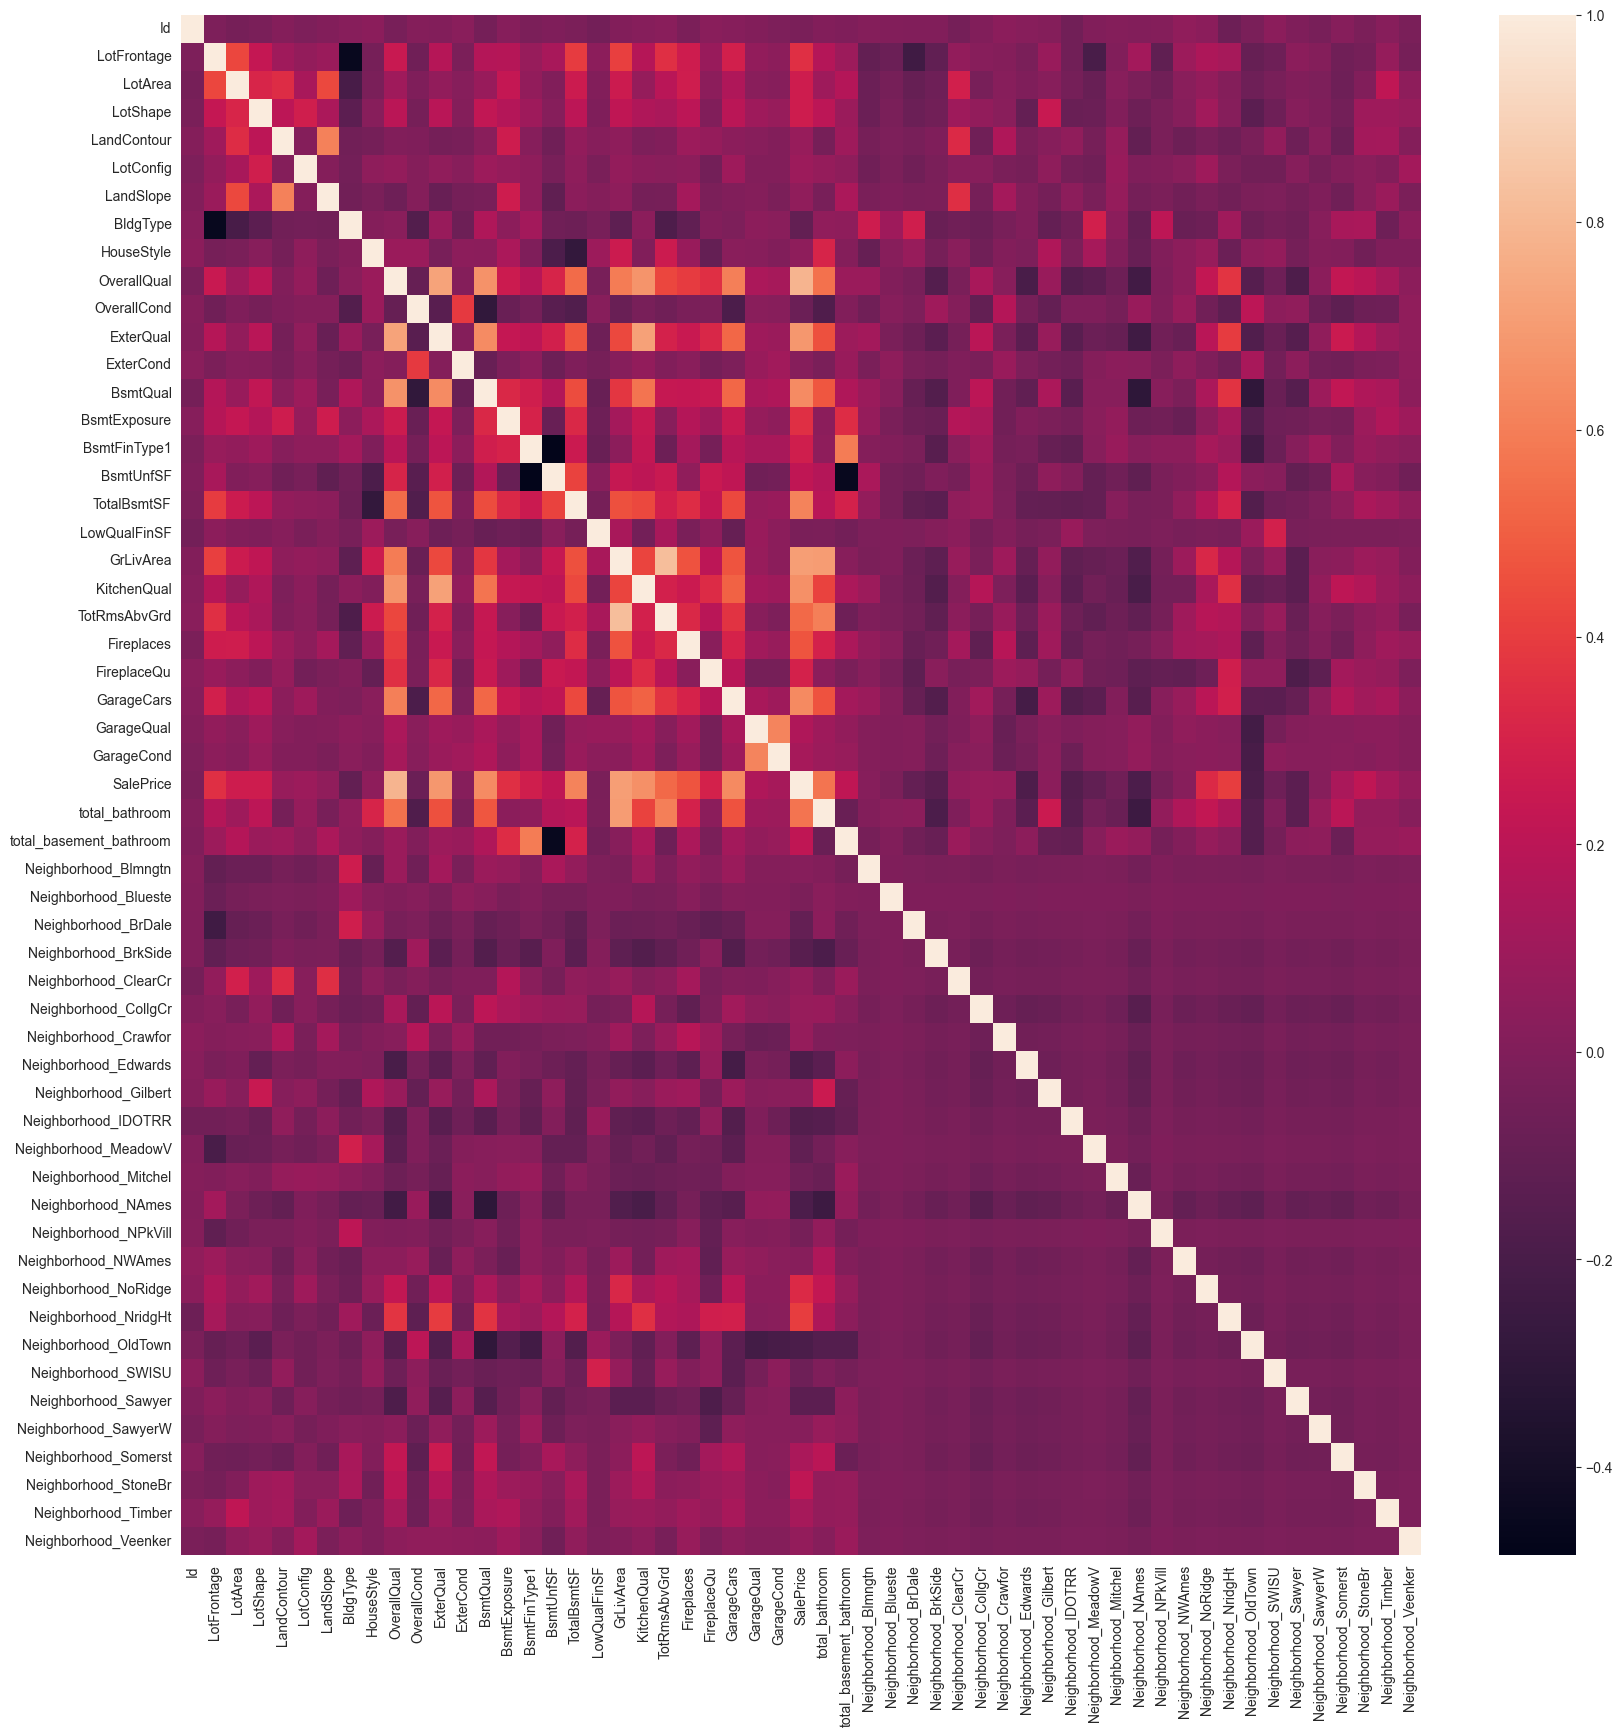

In [235]:
plt.figure(figsize=(20, 20))
sns.heatmap(train_df.corr())
train_df.head()

In [236]:
import pandas as pd
from autogluon.tabular import TabularPredictor

ModuleNotFoundError: No module named 'autogluon'